In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from numpy.random import RandomState

_PRNG = RandomState(0)

In [2]:
_FILE_ORIGINAL_DATASET="data/LoanStats_2018Q3.csv"

df = pd.read_csv(_FILE_ORIGINAL_DATASET)

C:\Users\juszhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.97%,507.55,D,D1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000,60 months,13.56%,576.02,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,30000,30000,30000,36 months,18.94%,1098.78,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,6000,6000,6000,36 months,7.84%,187.58,A,A4,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,10650,10650,10650,36 months,7.84%,332.95,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [5]:
[col for col in df.columns if all(df[col].isnull())]

['id', 'member_id', 'url', 'desc']

In [6]:
[(col, df[col].unique()) for col in df.columns]

[('id', array([nan])),
 ('member_id', array([nan])),
 ('loan_amnt',
  array([20000, 25000, 30000, ..., 31850, 36750, 21925], dtype=int64)),
 ('funded_amnt',
  array([20000, 25000, 30000, ..., 31850, 36750, 21925], dtype=int64)),
 ('funded_amnt_inv',
  array([20000, 25000, 30000, ...,  3175, 21925, 36725], dtype=int64)),
 ('term', array([' 60 months', ' 36 months'], dtype=object)),
 ('int_rate',
  array([' 17.97%', ' 13.56%', ' 18.94%', '  7.84%', '  6.11%', '  6.67%',
         '  7.21%', ' 15.02%', '  8.46%', ' 20.89%', ' 22.35%', ' 16.91%',
         ' 16.14%', ' 12.73%', ' 14.47%', ' 11.55%', ' 10.47%', ' 11.06%',
         ' 10.08%', ' 29.69%', ' 23.40%', ' 28.72%', ' 19.92%', ' 26.31%',
         ' 25.34%', ' 27.27%', ' 24.37%', ' 30.79%', ' 30.65%', ' 30.99%',
         ' 30.17%', ' 30.75%', ' 30.94%', ' 30.84%', '  6.00%', ' 30.89%',
         ' 14.03%', ' 13.06%', '  6.19%', ' 11.05%', ' 15.49%', ' 21.85%',
         ' 10.56%', '  7.46%', '  5.31%', ' 14.52%', '  9.58%', ' 18.45%',
  

In [7]:
df.addr_state.value_counts()

CA    17384
TX    10680
NY    10357
FL     9820
IL     5296
NJ     4734
PA     4212
OH     4170
GA     4134
NC     3349
VA     3344
MI     3259
AZ     3158
MD     3127
MA     2891
CO     2804
WA     2588
TN     2129
CT     2114
MO     2095
IN     2075
MN     2050
NV     1951
WI     1649
SC     1633
OR     1554
AL     1435
LA     1331
KY     1265
OK     1216
KS     1055
AR      979
MS      790
UT      790
NM      669
WV      669
NE      606
NH      601
RI      562
HI      534
ID      448
ME      432
DE      404
MT      314
VT      282
ND      268
DC      253
AK      250
SD      243
WY      241
Name: addr_state, dtype: int64

In [8]:
for idx, val in df.addr_state.value_counts().iteritems():
    print(idx, val)
    break

CA 17384


In [9]:
# https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-detail.html
df_state = pd.read_csv("population/raw/scprc-est2018-18+pop-res.csv")

# Remove first row containing summary
df_state.drop(axis=0, index=0, inplace=True)

# Remove last row containing Puerto Rico, LendingClub is not available in Puerto Rico
df_state.drop(axis=0, index=len(df_state), inplace=True)

pop_min = df_state["POPEST18PLUS2018"].min()
pop_max = df_state["POPEST18PLUS2018"].max()

df_state.tail()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS
47,40,3,5,51,Virginia,8517685,6647893,78.0
48,40,4,9,53,Washington,7535591,5872306,77.9
49,40,3,5,54,West Virginia,1805832,1441672,79.8
50,40,2,3,55,Wisconsin,5813568,4537465,78.0
51,40,4,8,56,Wyoming,577737,442962,76.7


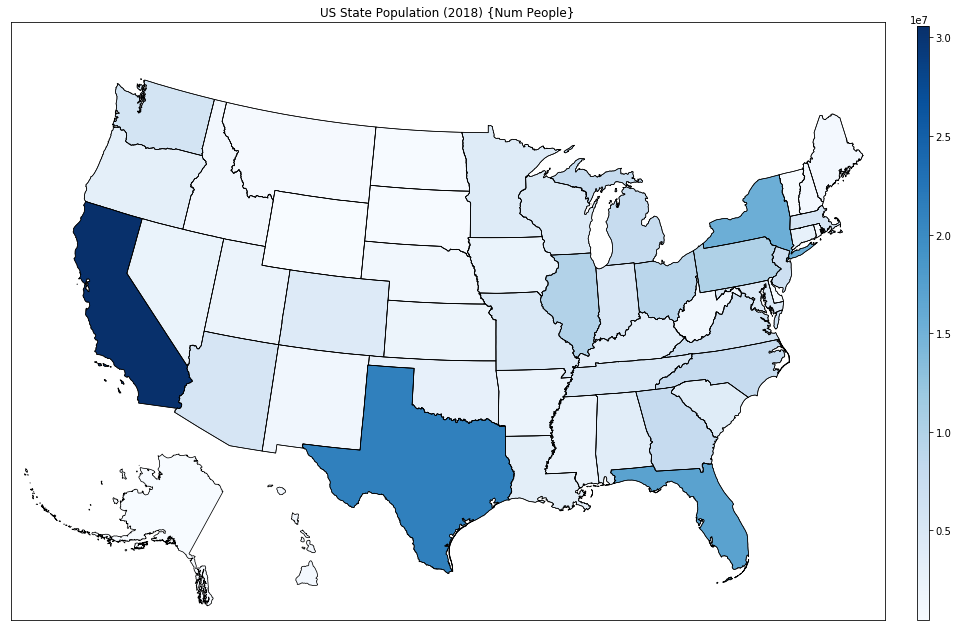

In [10]:
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

from itertools import starmap
import re

plt.figure(figsize=(16,11))

# https://stackoverflow.com/questions/40453163/plotting-points-on-a-map-of-the-united-states
m = Basemap(llcrnrlon=-121, llcrnrlat=20, urcrnrlon=-62, urcrnrlat=51, projection='lcc', lat_1=32, lat_2=45, lon_0=-95)

# https://infosys.ars.usda.gov/svn/code/weps1/trunk/weps.install/db/gis/st99_d00/
# https://github.com/matplotlib/basemap/tree/master/examples
m.readshapefile('map/st99_d00', name='states', drawbounds=True)

ax = plt.gca()
fig = plt.gcf()

_NORMALIZE = Normalize(vmin=pop_min, vmax=pop_max)
_COLORMAP = plt.cm.ScalarMappable(norm=_NORMALIZE, cmap=plt.cm.Blues)
        
# Hawaii has 8 main islands but several tiny atolls that extend for many miles
# This is the area cutoff between the 8 main islands and the tiny atolls
_ATOLL_CUTOFF = 0.005        

for state_info, seg in zip(m.states_info, m.states):
    state_name = state_info["NAME"]
    
    population = df_state.loc[df_state["NAME"].str.contains("^" + state_name, flags=re.IGNORECASE, regex=True), "POPEST18PLUS2018"]
    color = _COLORMAP.to_rgba(population).ravel()
    
    # Offset Alaska and Hawaii to the lower-left corner
    # Offset Puerto Rico to the bottom-right corner
    if re.match("^Alaska", state_name):
        # Alaska is too big. Scale it down to 35% first, then transate it.
        seg = list(starmap(lambda x,y: (0.35*x + 980000, 0.35*y - 1300000), seg))
    elif re.match("^Hawaii", state_name) and float(state_info["AREA"]) > _ATOLL_CUTOFF:
        seg = list(starmap(lambda x,y: (x + 5100000, y - 1400000), seg))
    elif re.match("^Puerto Rico", state_name):
        seg = list(starmap(lambda x,y: (x - 1050000, y + 352738), seg))
        # Skipping, LendingClub is not available in Puerto Rico
        continue
    poly = Polygon(seg, facecolor=color, edgecolor="k", linewidth=.75)
    ax.add_patch(poly)

plt.title("US State Population (2018) {Num People}")

# Colorbar
cax = fig.add_axes([.92, 0.125, 0.01, .75])
colorbar = ColorbarBase(cax, cmap=plt.cm.Blues, norm=_NORMALIZE)
plt.show()

In [11]:
df_abbv = pd.read_csv("population/state_abbv_to_state_name.csv")

abbv_to_state_name = df_abbv.set_index("Abbreviation").T.to_dict("records")[0]

df_abbv.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [12]:
# Can't run multiprocessing on Juypter Notebook on Windows, could have used Pool to decrease computation time
loan_total_by_state = {}
for _, row in df.iterrows():
    state_name = abbv_to_state_name[row["addr_state"]]
    loan_total_by_state[state_name] = loan_total_by_state.get(state_name, 0) + row["loan_amnt"]

loan_total_by_state_min = min(loan_total_by_state.values())
loan_total_by_state_max = max(loan_total_by_state.values())

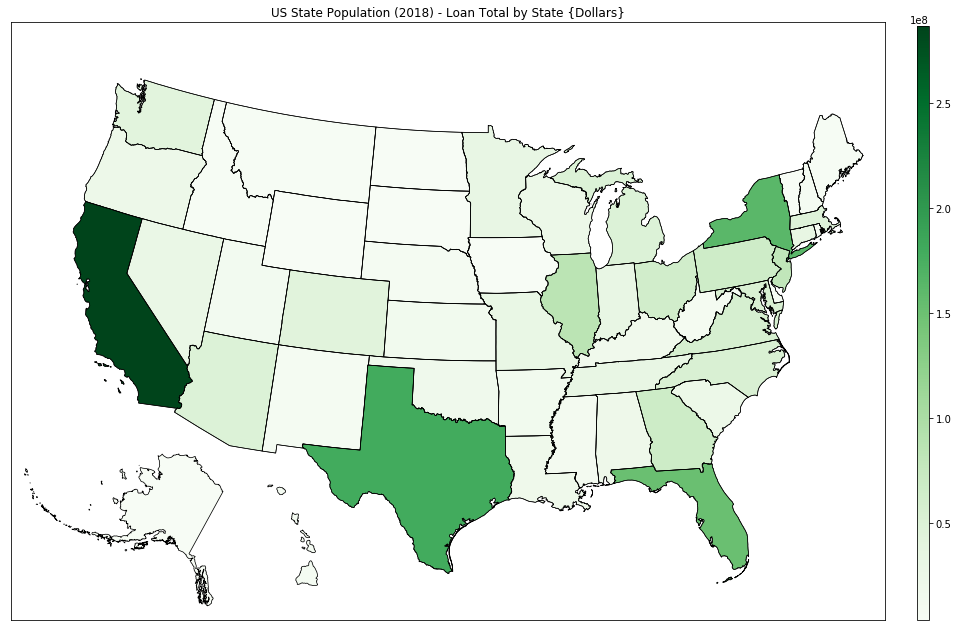

In [13]:
plt.figure(figsize=(16,11))

# https://stackoverflow.com/questions/40453163/plotting-points-on-a-map-of-the-united-states
m = Basemap(llcrnrlon=-121, llcrnrlat=20, urcrnrlon=-62, urcrnrlat=51, projection='lcc', lat_1=32, lat_2=45, lon_0=-95)

# https://infosys.ars.usda.gov/svn/code/weps1/trunk/weps.install/db/gis/st99_d00/
# https://github.com/matplotlib/basemap/tree/master/examples
m.readshapefile('map/st99_d00', name='states', drawbounds=True)

ax = plt.gca()
fig = plt.gcf()

_NORMALIZE = Normalize(vmin=loan_total_by_state_min, vmax=loan_total_by_state_max)
_COLORMAP = plt.cm.ScalarMappable(norm=_NORMALIZE, cmap=plt.cm.Greens)
        
# Hawaii has 8 main islands but several tiny atolls that extend for many miles
# This is the area cutoff between the 8 main islands and the tiny atolls
_ATOLL_CUTOFF = 0.005        

for state_info, seg in zip(m.states_info, m.states):
    state_name = state_info["NAME"]
    
    population = 0
    if state_name in loan_total_by_state:
        population = loan_total_by_state[state_name]
    color = _COLORMAP.to_rgba(population)
    
    # Offset Alaska and Hawaii to the lower-left corner
    # Offset Puerto Rico to the bottom-right corner
    if re.match("^Alaska", state_name):
        # Alaska is too big. Scale it down to 35% first, then transate it.
        seg = list(starmap(lambda x,y: (0.35*x + 980000, 0.35*y - 1300000), seg))
    elif re.match("^Hawaii", state_name) and float(state_info["AREA"]) > _ATOLL_CUTOFF:
        seg = list(starmap(lambda x,y: (x + 5100000, y - 1400000), seg))
    elif re.match("^Puerto Rico", state_name):
        seg = list(starmap(lambda x,y: (x - 1050000, y + 352738), seg))
        # Skipping, LendingClub is not available in Puerto Rico
        continue
    poly = Polygon(seg, facecolor=color, edgecolor="k", linewidth=.75)
    ax.add_patch(poly)

plt.title("US State Population (2018) - Loan Total by State {Dollars}")

# Colorbar
cax = fig.add_axes([.92, 0.125, 0.01, .75])
colorbar = ColorbarBase(cax, cmap=plt.cm.Greens, norm=_NORMALIZE)
plt.show()

In [14]:
def calculate_state_loan_population_normalized(state_abbv:str, borrow_pop:int) -> float:
    return float(borrow_pop / df_state.loc[df_state["NAME"].str.contains("^" + abbv_to_state_name[state_abbv], flags=re.IGNORECASE, regex=True), "POPEST18PLUS2018"]) * 100

state_loan_population_normalized = {}
for state_abbv, borrow_pop in df.addr_state.value_counts().to_dict().items():
    state_loan_population_normalized[abbv_to_state_name[state_abbv]] = calculate_state_loan_population_normalized(state_abbv, borrow_pop)

# loan_pop_min_normalized = min(state_loan_population_normalized.values())
loan_pop_min_normalized = 0
loan_pop_max_normalized = max(state_loan_population_normalized.values())

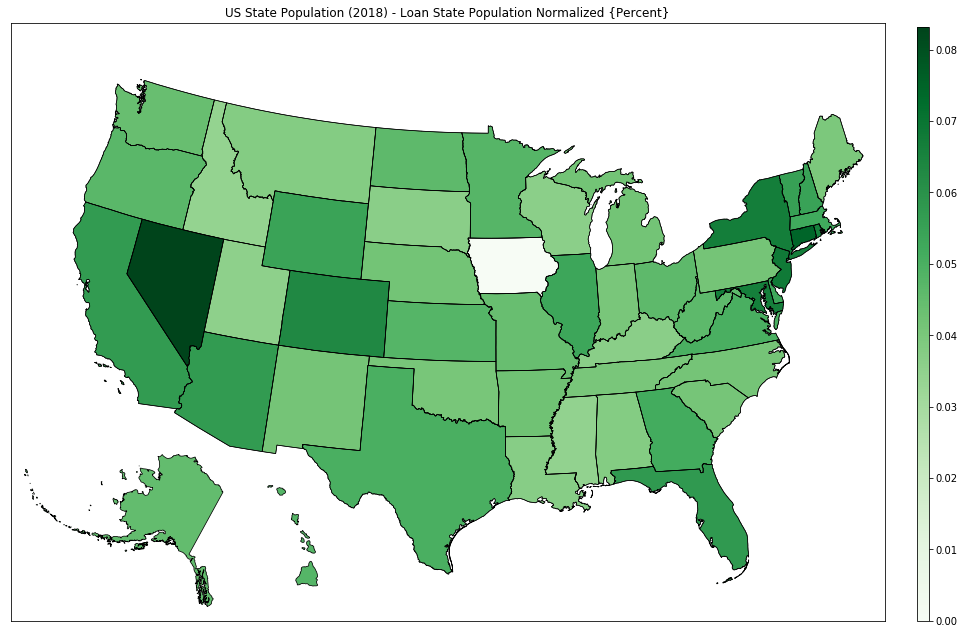

In [15]:
plt.figure(figsize=(16,11))

# https://stackoverflow.com/questions/40453163/plotting-points-on-a-map-of-the-united-states
m = Basemap(llcrnrlon=-121, llcrnrlat=20, urcrnrlon=-62, urcrnrlat=51, projection='lcc', lat_1=32, lat_2=45, lon_0=-95)

# https://infosys.ars.usda.gov/svn/code/weps1/trunk/weps.install/db/gis/st99_d00/
# https://github.com/matplotlib/basemap/tree/master/examples
m.readshapefile('map/st99_d00', name='states', drawbounds=True)

ax = plt.gca()
fig = plt.gcf()

_NORMALIZE = Normalize(vmin=loan_pop_min_normalized, vmax=loan_pop_max_normalized)
_COLORMAP = plt.cm.ScalarMappable(norm=_NORMALIZE, cmap=plt.cm.Greens)
        
# Hawaii has 8 main islands but several tiny atolls that extend for many miles
# This is the area cutoff between the 8 main islands and the tiny atolls
_ATOLL_CUTOFF = 0.005        

for state_info, seg in zip(m.states_info, m.states):
    state_name = state_info["NAME"]
    
    population = 0
    if state_name in state_loan_population_normalized:
        population = state_loan_population_normalized[state_name]
    color = _COLORMAP.to_rgba(population)
    
    # Offset Alaska and Hawaii to the lower-left corner
    # Offset Puerto Rico to the bottom-right corner
    if re.match("^Alaska", state_name):
        # Alaska is too big. Scale it down to 35% first, then transate it.
        seg = list(starmap(lambda x,y: (0.35*x + 980000, 0.35*y - 1300000), seg))
    elif re.match("^Hawaii", state_name) and float(state_info["AREA"]) > _ATOLL_CUTOFF:
        seg = list(starmap(lambda x,y: (x + 5100000, y - 1400000), seg))
    elif re.match("^Puerto Rico", state_name):
        seg = list(starmap(lambda x,y: (x - 1050000, y + 352738), seg))
        # Skipping, LendingClub is not available in Puerto Rico
        continue
    poly = Polygon(seg, facecolor=color, edgecolor="k", linewidth=.75)
    ax.add_patch(poly)

plt.title("US State Population (2018) - Loan State Population Normalized {Percent}")

# Colorbar
cax = fig.add_axes([.92, 0.125, 0.01, .75])
colorbar = ColorbarBase(cax, cmap=plt.cm.Greens, norm=_NORMALIZE)
plt.show()